# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [4]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

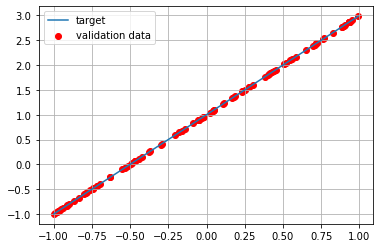

In [5]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [6]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [7]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [8]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 1s 10ms/step - loss: 4.9685 - mse: 4.9685 - val_loss: 3.6279 - val_mse: 3.6279
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 2.9805 - mse: 2.9805 - val_loss: 2.2484 - val_mse: 2.2484
Epoch 3/30
32/32 [==============================] - 0s 1ms/step - loss: 1.7833 - mse: 1.7833 - val_loss: 1.4403 - val_mse: 1.4403
Epoch 4/30
32/32 [==============================] - 0s 1ms/step - loss: 1.1405 - mse: 1.1405 - val_loss: 0.9284 - val_mse: 0.9284
Epoch 5/30
32/32 [==============================] - 0s 1ms/step - loss: 0.7275 - mse: 0.7275 - val_loss: 0.6002 - val_mse: 0.6002
Epoch 6/30
32/32 [==============================] - 0s 1ms/step - loss: 0.4812 - mse: 0.4812 - val_loss: 0.3891 - val_mse: 0.3891
Epoch 7/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3088 - mse: 0.3088 - val_loss: 0.2535 - val_mse: 0.2535
Epoch 8/30
32/32 [==============================] - 0s 1ms/step - loss: 0.1998 - mse: 0.1

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [9]:
# return weights and biases
model.get_weights()

[array([[1.9945292]], dtype=float32), array([0.9999348], dtype=float32)]

In [10]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 1ms/step - loss: 1.1586e-05 - mse: 1.1586e-05

Test loss: 1.1586173968680669e-05
Test accuracy: 1.1586173968680669e-05


In [11]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 1ms/step - loss: 1.1586e-05 - mse: 1.1586e-05

Test loss: 1.1586173968680669e-05
Test accuracy: 1.1586173968680669e-05


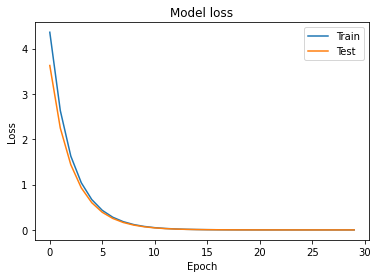

In [12]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

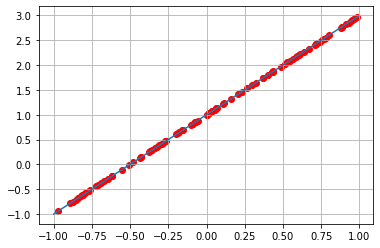

In [13]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

##  Model 2 : $\sigma = 0.6  , N_{train} = 1000  ,  epochs = 30 $

In [14]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.6 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

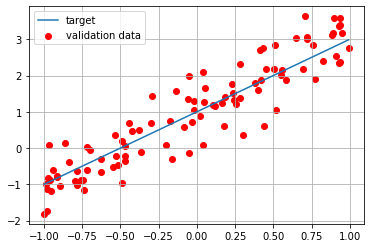

In [15]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [17]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 0s 5ms/step - loss: 1.1698 - mse: 1.1698 - val_loss: 0.6697 - val_mse: 0.6697
Epoch 2/30
32/32 [==============================] - 0s 1ms/step - loss: 0.6225 - mse: 0.6225 - val_loss: 0.4440 - val_mse: 0.4440
Epoch 3/30
32/32 [==============================] - 0s 1ms/step - loss: 0.4231 - mse: 0.4231 - val_loss: 0.3688 - val_mse: 0.3688
Epoch 4/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3760 - mse: 0.3760 - val_loss: 0.3399 - val_mse: 0.3399
Epoch 5/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3848 - mse: 0.3848 - val_loss: 0.3243 - val_mse: 0.3243
Epoch 6/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3657 - mse: 0.3657 - val_loss: 0.3164 - val_mse: 0.3164
Epoch 7/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3630 - mse: 0.3630 - val_loss: 0.3106 - val_mse: 0.3106
Epoch 8/30
32/32 [==============================] - 0s 1ms/step - loss: 0.3512 - mse: 0.35

In [18]:
# evaluate model
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 3ms/step - loss: 0.2957 - mse: 0.2957

Test loss: 0.2956928014755249
Test accuracy: 0.2956928014755249


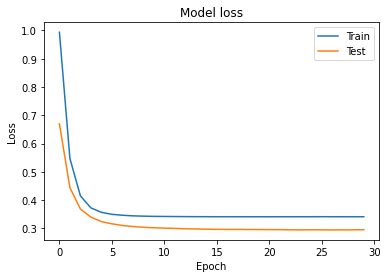

In [19]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

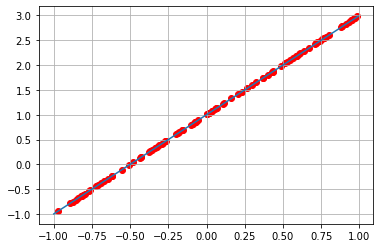

In [20]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

##  Model 3 : $\sigma = 0.7  , N_{train} = 600  ,  epochs = 15 $

In [21]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 600)
x_valid = np.random.uniform(-1, 1, 60)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.7 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

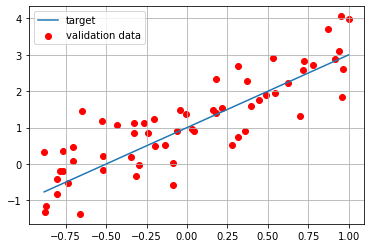

In [22]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [24]:
# fit the model using training dataset
# over 15 epochs of 32 batch size each
# report training progress against validation data
history = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=15,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/15
19/19 [==============================] - 0s 6ms/step - loss: 4.7034 - mse: 4.7034 - val_loss: 3.4858 - val_mse: 3.4858
Epoch 2/15
19/19 [==============================] - 0s 2ms/step - loss: 3.6990 - mse: 3.6990 - val_loss: 2.6222 - val_mse: 2.6222
Epoch 3/15
19/19 [==============================] - 0s 2ms/step - loss: 2.3172 - mse: 2.3172 - val_loss: 2.0283 - val_mse: 2.0283
Epoch 4/15
19/19 [==============================] - 0s 2ms/step - loss: 1.9882 - mse: 1.9882 - val_loss: 1.6090 - val_mse: 1.6090
Epoch 5/15
19/19 [==============================] - 0s 2ms/step - loss: 1.5849 - mse: 1.5849 - val_loss: 1.3104 - val_mse: 1.3104
Epoch 6/15
19/19 [==============================] - 0s 2ms/step - loss: 1.3197 - mse: 1.3197 - val_loss: 1.0925 - val_mse: 1.0925
Epoch 7/15
19/19 [==============================] - 0s 2ms/step - loss: 1.0382 - mse: 1.0382 - val_loss: 0.9305 - val_mse: 0.9305
Epoch 8/15
19/19 [==============================] - 0s 2ms/step - loss: 0.9861 - mse: 0.98

In [25]:
# evaluate model
score = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.5053 - mse: 0.5053

Test loss: 0.5053044557571411
Test accuracy: 0.5053044557571411


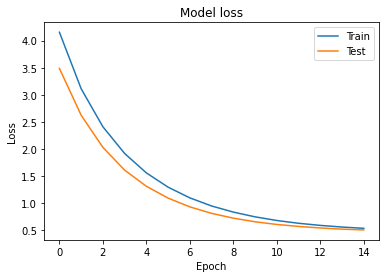

In [26]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

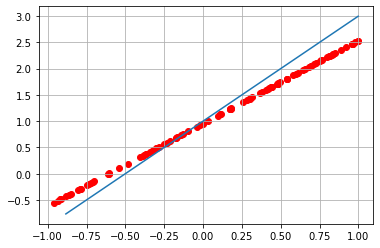

In [27]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

##  Model 4 : $\sigma = 0.2  , N_{train} = 400  ,  epochs = 50 $

In [28]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 400)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

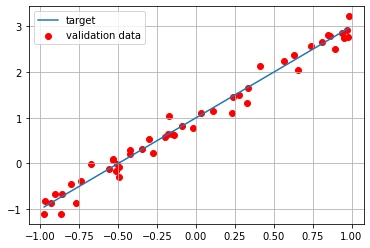

In [29]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
model4 = tf.keras.Sequential()
model4.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [31]:
# fit the model using training dataset
# over 50 epochs of 32 batch size each
# report training progress against validation data
history = model4.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
13/13 [==============================] - 0s 9ms/step - loss: 5.1353 - mse: 5.1353 - val_loss: 4.5165 - val_mse: 4.5165
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 3.7277 - mse: 3.7277 - val_loss: 3.6747 - val_mse: 3.6747
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 3.0957 - mse: 3.0957 - val_loss: 3.0268 - val_mse: 3.0268
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 2.5093 - mse: 2.5093 - val_loss: 2.5168 - val_mse: 2.5168
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 2.0778 - mse: 2.0778 - val_loss: 2.0956 - val_mse: 2.0956
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 1.6904 - mse: 1.6904 - val_loss: 1.7561 - val_mse: 1.7561
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 1.3665 - mse: 1.3665 - val_loss: 1.4744 - val_mse: 1.4744
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 1.2228 - mse: 1.22

In [32]:
# evaluate model
score = model4.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 1ms/step - loss: 0.0319 - mse: 0.0319

Test loss: 0.031940944492816925
Test accuracy: 0.031940944492816925


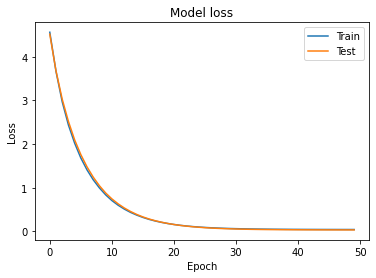

In [33]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

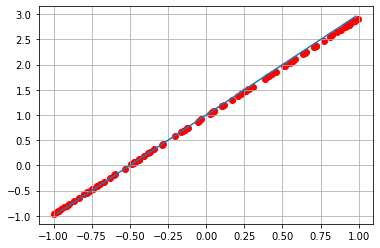

In [34]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model4.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

In [35]:
print(model2.get_weights())
print(model3.get_weights())
print(model4.get_weights())

[array([[2.0044627]], dtype=float32), array([1.0029529], dtype=float32)]
[array([[1.5759056]], dtype=float32), array([0.9564624], dtype=float32)]
[array([[1.9419631]], dtype=float32), array([0.97481126], dtype=float32)]


1. The first model has $\sigma = 0.6$ , 1000 training data e 30 epochs.
2. The second model has $\sigma = 0.7$ , 600 training data e 15 epochs.
3. Il terzo modello ha $\sigma = 0.2$ , 400 training data e 50 epochs.

The most accurate predictions were made by the first model. Even though the noise was pretty large, the number of training data compensated it sufficiently. The worst prediction was made by the second model: the combination of fewer epochs and higher noise is obviously the reason for this. As for the third model, we have a pretty good result: here we can see that a higher number of epochs doesn't immediately mean higher accuracy; it is the number of the training data that is more important than the number of epochs.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [36]:
def f(x):
    return 4 - 3 * x - 2 * x**2 + 3 * x**3

In [45]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 6000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = f(x_valid)  # ideal (target) linear function

sigma = 0.35 # noise standard deviation
y_train = np.random.normal( f(x_train) , sigma ) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal( f(x_valid), sigma )

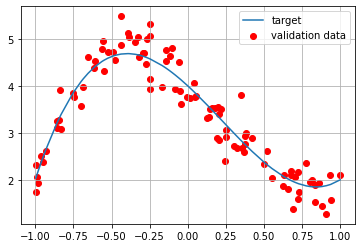

In [46]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
Model_1 = tf.keras.Sequential()
Model_1.add(Dense( 200 , input_shape=(1,) , activation= "relu" ))
Model_1.add(Dense( 100 , activation= "relu" ))
Model_1.add(Dense( 45 , activation= "relu" ))
Model_1.add(Dense( 1  , activation= "relu"))

# compile the model choosing optimizer, loss and metrics objects
Model_1.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['mse'])

In [48]:
Model_2 = tf.keras.Sequential()
Model_2.add(Dense( 200 , input_shape=(1,) , activation= "selu" ))
Model_2.add(Dense( 45  , activation= "selu" ))
Model_2.add(Dense( 1  , activation= "selu" ))

# compile the model choosing optimizer, loss and metrics objects
Model_2.compile(optimizer=tf.keras.optimizers.Adamax(), loss="mse", metrics=['mse'])

In [49]:
Model_3 = tf.keras.Sequential()
Model_3.add(Dense( 200 , input_shape=(1,) , activation= "elu" ))
Model_3.add(Dense( 40 ,  activation= "elu" ))
Model_3.add(Dense( 1 ,  activation= "elu" ))

# compile the model choosing optimizer, loss and metrics objects
Model_3.compile(optimizer=tf.keras.optimizers.Nadam(), loss='mse', metrics=['mse'])

In [50]:
history_1 = Model_1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
188/188 [==============================] - 1s 1ms/step - loss: 5.3276 - mse: 5.3276 - val_loss: 0.3211 - val_mse: 0.3211
Epoch 2/30
188/188 [==============================] - 0s 947us/step - loss: 0.2030 - mse: 0.2030 - val_loss: 0.1207 - val_mse: 0.1207
Epoch 3/30
188/188 [==============================] - 0s 936us/step - loss: 0.1367 - mse: 0.1367 - val_loss: 0.1045 - val_mse: 0.1045
Epoch 4/30
188/188 [==============================] - 0s 984us/step - loss: 0.1278 - mse: 0.1278 - val_loss: 0.1177 - val_mse: 0.1177
Epoch 5/30
188/188 [==============================] - 0s 954us/step - loss: 0.1294 - mse: 0.1294 - val_loss: 0.1036 - val_mse: 0.1036
Epoch 6/30
188/188 [==============================] - 0s 948us/step - loss: 0.1340 - mse: 0.1340 - val_loss: 0.1299 - val_mse: 0.1299
Epoch 7/30
188/188 [==============================] - 0s 951us/step - loss: 0.1285 - mse: 0.1285 - val_loss: 0.1395 - val_mse: 0.1395
Epoch 8/30
188/188 [==============================] - 0s 965us/s

In [51]:
history_2 = Model_2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
188/188 [==============================] - 0s 2ms/step - loss: 3.8576 - mse: 3.8576 - val_loss: 0.7098 - val_mse: 0.7098
Epoch 2/30
188/188 [==============================] - 0s 857us/step - loss: 0.4645 - mse: 0.4645 - val_loss: 0.4286 - val_mse: 0.4286
Epoch 3/30
188/188 [==============================] - 0s 819us/step - loss: 0.2906 - mse: 0.2906 - val_loss: 0.2528 - val_mse: 0.2528
Epoch 4/30
188/188 [==============================] - 0s 806us/step - loss: 0.2010 - mse: 0.2010 - val_loss: 0.1894 - val_mse: 0.1894
Epoch 5/30
188/188 [==============================] - 0s 860us/step - loss: 0.1709 - mse: 0.1709 - val_loss: 0.1568 - val_mse: 0.1568
Epoch 6/30
188/188 [==============================] - 0s 809us/step - loss: 0.1610 - mse: 0.1610 - val_loss: 0.1367 - val_mse: 0.1367
Epoch 7/30
188/188 [==============================] - 0s 869us/step - loss: 0.1489 - mse: 0.1489 - val_loss: 0.1252 - val_mse: 0.1252
Epoch 8/30
188/188 [==============================] - 0s 802us/s

In [52]:
history_3 = Model_3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
188/188 [==============================] - 1s 1ms/step - loss: 4.8224 - mse: 4.8224 - val_loss: 0.7170 - val_mse: 0.7170
Epoch 2/30
188/188 [==============================] - 0s 788us/step - loss: 0.4748 - mse: 0.4748 - val_loss: 0.3461 - val_mse: 0.3461
Epoch 3/30
188/188 [==============================] - 0s 856us/step - loss: 0.2909 - mse: 0.2909 - val_loss: 0.2252 - val_mse: 0.2252
Epoch 4/30
188/188 [==============================] - 0s 789us/step - loss: 0.2070 - mse: 0.2070 - val_loss: 0.1801 - val_mse: 0.1801
Epoch 5/30
188/188 [==============================] - 0s 790us/step - loss: 0.1811 - mse: 0.1811 - val_loss: 0.1514 - val_mse: 0.1514
Epoch 6/30
188/188 [==============================] - 0s 827us/step - loss: 0.1640 - mse: 0.1640 - val_loss: 0.1347 - val_mse: 0.1347
Epoch 7/30
188/188 [==============================] - 0s 777us/step - loss: 0.1560 - mse: 0.1560 - val_loss: 0.1905 - val_mse: 0.1905
Epoch 8/30
188/188 [==============================] - 0s 779us/s

In [53]:
# evaluate model
score_1 = Model_1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score_2 = Model_2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score_3 = Model_3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print("Model 1: ")
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])

print("Model 2: ")
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

print("Model 3: ")
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

4/4 [==============================] - 0s 727us/step - loss: 0.1052 - mse: 0.1052
Model 1: 
Test loss: 0.11525260657072067
Test accuracy: 0.11525260657072067
Model 2: 
Test loss: 0.10956025123596191
Test accuracy: 0.10956025123596191
Model 3: 
Test loss: 0.10524608939886093
Test accuracy: 0.10524608939886093


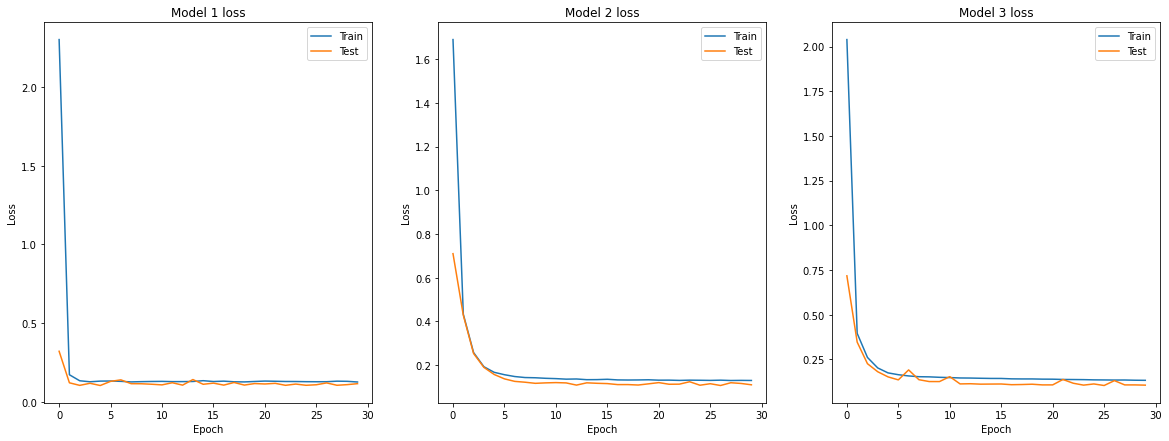

In [58]:
fig , ax = plt.subplots( 1 , 3 , figsize=(20 ,7))

# look into training history
# Plot training & validation loss values
ax[0].plot(history_1.history['loss'])
ax[0].plot(history_1.history['val_loss'])
ax[0].set_title('Model 1 loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='best')

ax[1].plot(history_2.history['loss'])
ax[1].plot(history_2.history['val_loss'])
ax[1].set_title('Model 2 loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')

ax[2].plot(history_3.history['loss'])
ax[2].plot(history_3.history['val_loss'])
ax[2].set_title('Model 3 loss')
ax[2].set_ylabel('Loss')
ax[2].set_xlabel('Epoch')
ax[2].legend(['Train', 'Test'], loc='best')

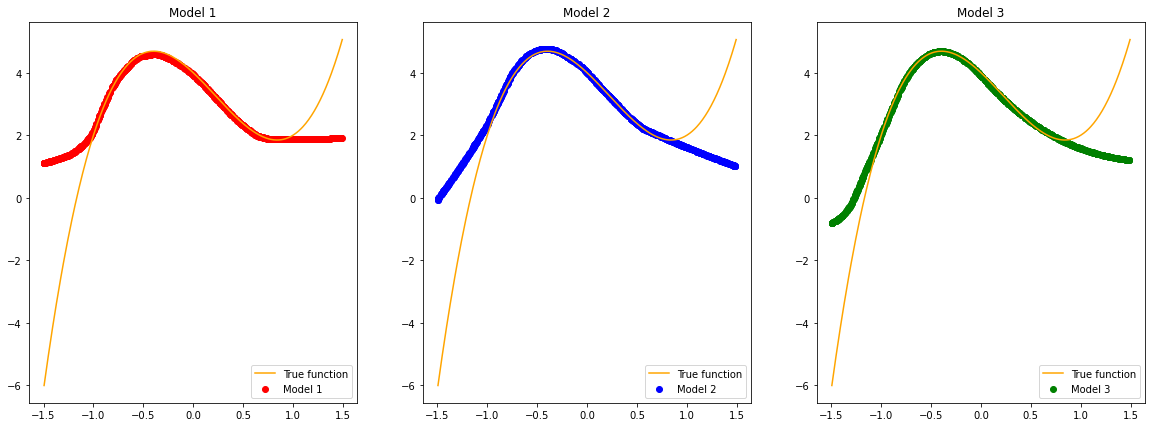

In [63]:
fig , ax = plt.subplots( 1 , 3 , figsize=(20 ,7))
x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()
y_target = f( x_valid )  # ideal (target) linear function
ax[0].plot(x_valid, y_target , color = "orange" , label = "True function")

x_predicted = np.random.uniform(-1.5, 1.5, 900)
y_predicted_1 = Model_1.predict(x_predicted)
y_predicted_2 = Model_2.predict(x_predicted)
y_predicted_3 = Model_3.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted_1 ,color='red' , label = "Model 1 ")
ax[0].set_title('Model 1')

ax[1].plot(x_valid, y_target , color = "orange" , label = "True function")
ax[1].scatter(x_predicted, y_predicted_2 ,color='blue' , label = "Model 2 ")
ax[1].set_title('Model 2')

ax[2].plot(x_valid, y_target , color = "orange" , label = "True function")
ax[2].scatter(x_predicted, y_predicted_3 ,color='green' , label = "Model 3 ")
ax[2].set_title('Model 3')

ax[0].legend()
ax[1].legend()
ax[2].legend()
#plt.legend(loc="best")
#plt.grid(True)
#plt.show()

    Model 1 is the deeper model: it presents 4 layers with "RELU" activation and optimization. Models 2 and 3 both have 3 layers, with "SELU" and "ELU" activation respectively. The optimizators used are ADAMAX and NADAM. 
    The fact that the predictions of all three neural networks are very similar in the training interval indicates that a fourth layer is pretty useless and doesn't really bring more efficiency.
    There isn't any big difference between the the optimizators used within the ADAM family, at least in this specific case. In all three cases, the MSE loss function was used.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [64]:
def my_target(x , y):
    return np.sin(x**2 + y**2) 

In [82]:
# generate training inputs
np.random.seed(0)
data_train = np.random.uniform( low = -1.5 , high= 1.5 , size=(1000 , 2) )
data_valid = np.random.uniform( low = -1.5 , high= 1.5 , size=(150 , 2) )
data_valid.sort()
data_target = my_target( data_valid[:,0] , data_valid[:,1] ) 

sigma = 0.2
f_train = np.random.normal( my_target( data_train[:,0] , data_train[:,1] ) , sigma )
f_valid = np.random.normal( data_target , sigma )

Text(0.5, 0.92, 'Training data')

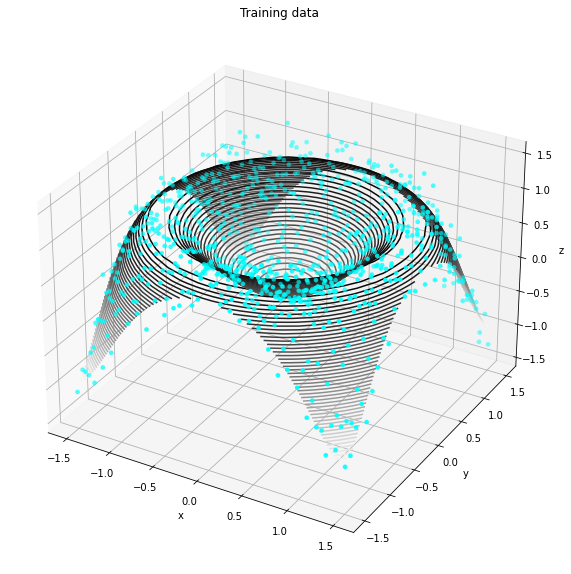

In [70]:
#Plotting the target function and the training data
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)

X, Y = np.meshgrid(x, y)
Z = my_target(X, Y)

ax.contour3D(X, Y, Z, 50, cmap='binary')

X, Y, np.meshgrid(x, y)
Z = np.random.normal(my_target(X, Y), sigma)
ax.scatter(X, Y, Z, color='cyan', linewidth=0.1);

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Training data')

In [71]:
Net = tf.keras.Sequential()
Net.add( Dense( 200, input_shape=(2,), activation="relu") )
Net.add( Dense( 130 , activation="relu" ) )
Net.add( Dense( 50, activation="relu") )
Net.add( Dense( 1, activation="relu") )
    
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

Net.compile( loss='mean_squared_error', optimizer=opt , metrics=['mse'] )

In [72]:
history = Net.fit(x=data_train, y=f_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(data_valid, f_valid))

Epoch 1/30
32/32 [==============================] - 0s 5ms/step - loss: 0.3409 - mse: 0.3409 - val_loss: 0.2298 - val_mse: 0.2298
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1859 - mse: 0.1859 - val_loss: 0.2084 - val_mse: 0.2084
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1832 - mse: 0.1832 - val_loss: 0.1901 - val_mse: 0.1901
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1727 - mse: 0.1727 - val_loss: 0.1894 - val_mse: 0.1894
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1608 - mse: 0.1608 - val_loss: 0.1626 - val_mse: 0.1626
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1355 - mse: 0.1355 - val_loss: 0.1430 - val_mse: 0.1430
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1372 - mse: 0.1372 - val_loss: 0.1423 - val_mse: 0.1423
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.11

In [73]:
# evaluate model
score = Net.evaluate(data_valid, f_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 1ms/step - loss: 0.0666 - mse: 0.0666

Test loss: 0.06658051908016205
Test accuracy: 0.06658051908016205


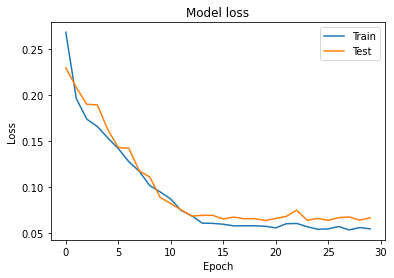

In [74]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

(-0.5, 99.5, -0.5, 99.5)

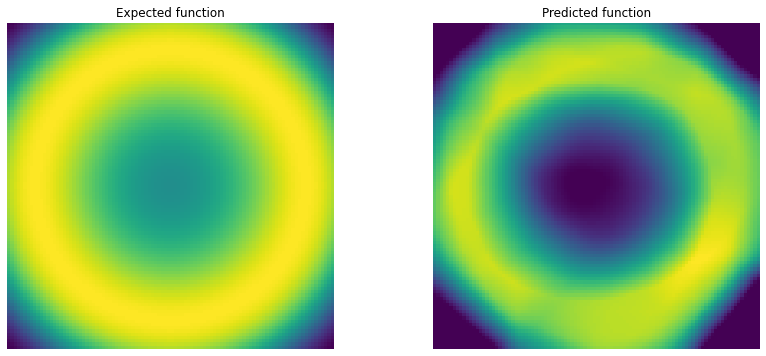

In [75]:
fig , ax = plt.subplots( 1 , 2 , figsize= (14 , 6) )

x = np.linspace(-1.5 , 1.5 , 100)
y = np.linspace(-1.5 , 1.5 , 100)
X,Y = np.meshgrid(x, y) # grid of point
Z = my_target(X, Y) # evaluation of the function on the grid
img = ax[0].imshow( Z , origin="lower")
ax[0].axis('off')
#fig.colorbar(img)
ax[0].set_title("Expected function")


data_in = np.zeros( [100*100,2] )
data_in[:,0]=X.flatten()
data_in[:,1]=Y.flatten()
f_pred = Net.predict(data_in)

ax[1].imshow( f_pred.reshape( (100,100) )  , origin='lower' )
ax[1].set_title("Predicted function")
ax[1].axis('off')

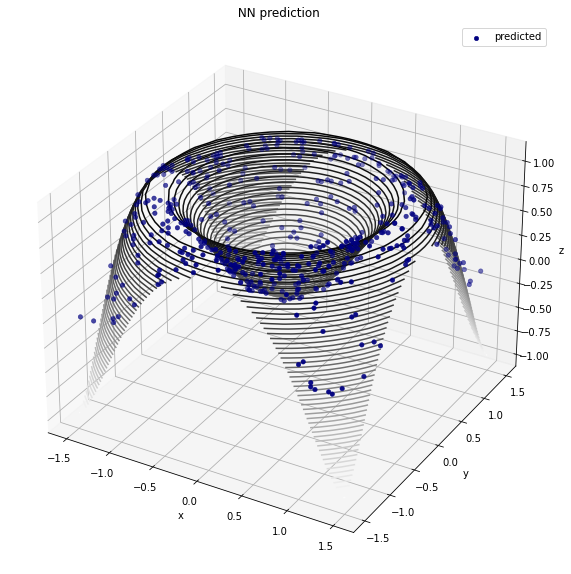

In [78]:
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)

X, Y = np.meshgrid(x, y)
Z = my_target(X, Y)
ax.contour3D(X, Y, Z, 50, cmap='binary')

x_predicted = np.random.uniform(-1.5, 1.5, size=(500,2))
y_predicted = Net.predict(x_predicted)

ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted, color='navy', linewidth=0.5, label='predicted')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title( " NN prediction " )
ax.legend()

For the fit of a two-dimensional function I used a deeper network, made up of 4 layers with "RELU" activation. The optimizer used is ADAM, which was found to be more effective in the previous exercises carried out. The training of the network required more data than in the previous cases, but the predictions of the model, as seen from the graphs, are good: the final loss function reaches a value of 0.06 and the predictions reflect the target function quite faithfully.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [84]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

In [ ]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()